In [1]:
import numpy as np
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (eval_data, eval_labels) = mnist.load_data()

In [3]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
eval_data = eval_data.reshape(eval_data.shape[0], 28, 28, 1) 

num_class = 10

train_labels = tf.keras.utils.to_categorical(train_labels, num_class)
eval_labels = tf.keras.utils.to_categorical(eval_labels, num_class)

In [4]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.30))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.40))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.50))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, name="output"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

In [5]:
model.fit(train_data, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 170s 91ms/step - loss: 0.2148 - accuracy: 0.9333
Epoch 2/2
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0768 - accuracy: 0.9762


In [6]:
model.evaluate(eval_data, eval_labels, verbose=2)

313/313 - 6s - loss: 0.0317 - accuracy: 0.9902


[0.03170010820031166, 0.9901999831199646]

In [7]:
import matplotlib.pyplot as plt

In [8]:
#make a list of the layers we care about (convolution and pooling)
layer_outputs = [layer.output for layer in model.layers[:4]]
#create a custom model that outputs the values of those layers
activation_model = tf.keras.Model(inputs=model.input,outputs=layer_outputs)
#predict on a 7 to fill those layers for drawing
activations = activation_model.predict(eval_data[0:])

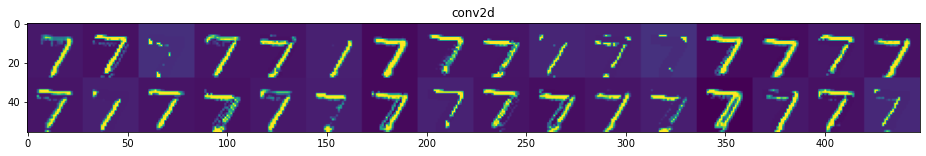

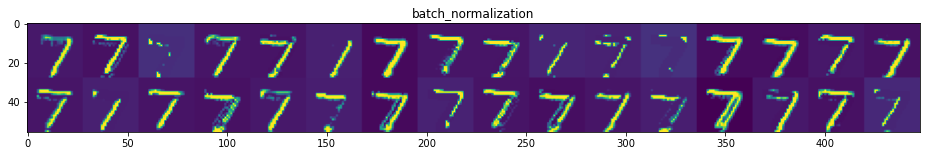

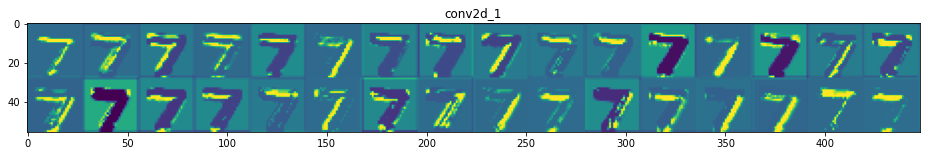

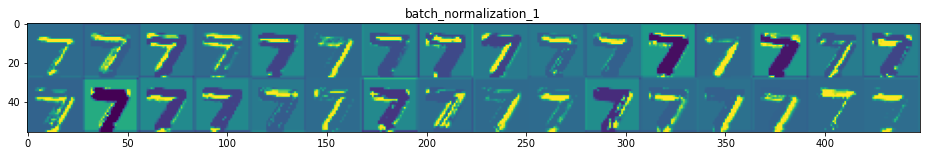

In [9]:
layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [10]:
#make a list of the layers we care about (convolution and pooling)
layer_outputs = [layer.output for layer in model.layers[:4]]
#create a custom model that outputs the values of those layers
activation_model = tf.keras.Model(inputs=model.input,outputs=layer_outputs)
#predict on a 7 to fill those layers for drawing
activations = activation_model.predict(eval_data[2:])

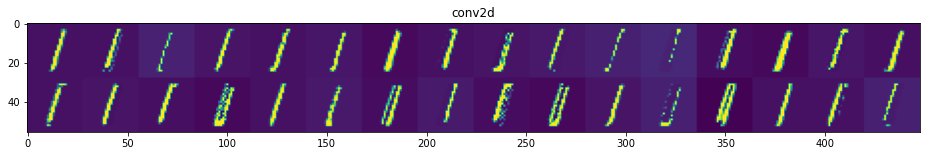

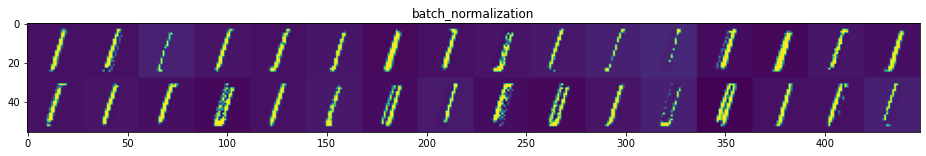

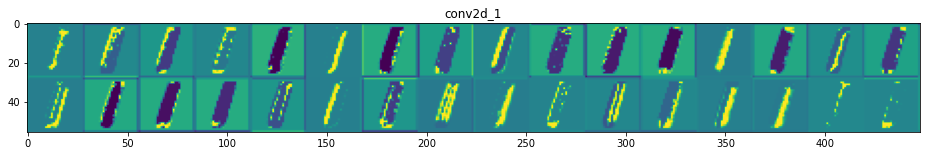

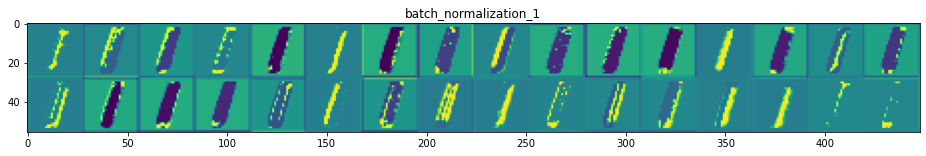

In [11]:
layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')